In [123]:
import pandas
from matplotlib import pyplot as plt

import librosa


In [149]:
def f_resolution(n_mels, fmin=0.0, fmax=11025, htk=False):
    fs = librosa.core.mel_frequencies(n_mels=n_mels,fmin=fmin,fmax=fmax,htk=htk)
    low = fs[1]-fs[0]
    mid = fs[n_mels//2]-fs[(n_mels//2)-1]
    high = fs[-1]-fs[-2]
    return low, mid, high


settings = [
    (128, 44100),
    (60, 20050),
    (50, 16000),
]
for mels, sr in settings:
    fs = f_resolution(mels, 0, fmax=sr/2)
    fs = [ int(f) for f in fs ]
    print('m', mels, sr, ":", *fs, int(sr/mels))


m 128 44100 : 31 91 704 344
m 60 20050 : 54 106 551 334
m 50 16000 : 61 107 492 320


In [158]:
(256/16)

16.0

params 520000.0


'\\begin{tabular}{lrlll}\n\\toprule\n{} &  Accuracy (\\%) & Multiply-Adds / second & Model parameters &                Data augmentation \\\\\nname         &               &                        &                  &                                  \\\\\n\\midrule\nDmix-CNN-mel &          82.6 &                   298M &            1180k &     pitchshift,timestretch,Mixup \\\\\nD-CNN        &          81.9 &                   458M &           33000k &                      timestretch \\\\\nLD-CNN       &          79.0 &                    10M &             580k &                      timestretch \\\\\nSB-CNN       &          78.0 &                    25M &             432k &  pitchshift,timestretch,noisemix \\\\\nPiczakCNN    &          75.0 &                    88M &           25534k &  pitchshift,timestretch,noisemix \\\\\n\\bottomrule\n\\end{tabular}\n'

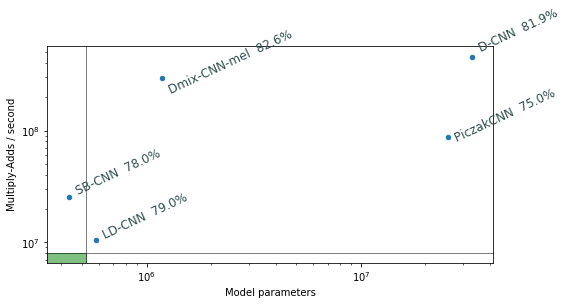